# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


The goal of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, \
f1_score, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import classification_report, roc_auc_score
# Import packages for data modeling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
# for building a knn and svm model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
print('Number of rows:', data.shape[0], 'Number of features:', data.shape[1])

Number of rows: 19382 Number of features: 12


Get the data types of the columns.

In [5]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
data = data.dropna()

In [10]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
data.duplicated().sum()

0

Check class balance.

In [12]:
# Check class balance
data['claim_status'].value_counts(normalize=True)

claim      0.503458
opinion    0.496542
Name: claim_status, dtype: float64

### **Task 3: Feature engineering**

Calculate the average text_length for claims and opinions.

In [13]:
data[['claim_status', 'video_transcription_text']].groupby(by='claim_status')[['video_transcription_text']].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
claim_status,
claim,95.376978
opinion,82.722562


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [14]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data['text_length'] = data['video_transcription_text'].str.len()

In [15]:
# Display first few rows of dataframe after adding new column
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `text_length` for claims and opinions.

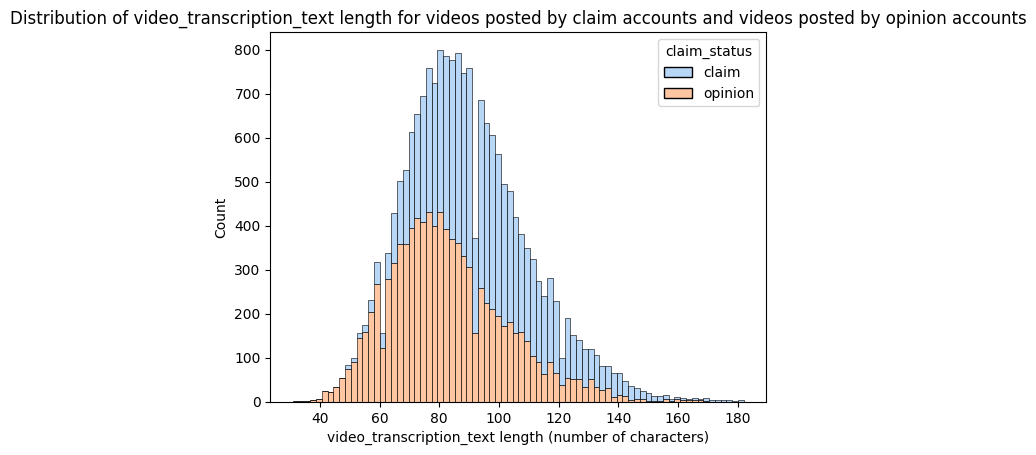

In [16]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data=data, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel",
             hue="claim_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by claim accounts and videos posted by opinion accounts")
plt.show()

Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

In [17]:
data['claim_status'] = np.where(data['claim_status'] == 'opinion', 0, 1)

In [18]:
# Encode variables
data['verified_status'] = OneHotEncoder(sparse_output=False).fit_transform(data[['verified_status']])
data['verified_status'] = data['verified_status'].astype(int)
data['author_ban_status'] = OneHotEncoder(sparse_output=False, drop='first').fit_transform(data[['author_ban_status']])
data['author_ban_status'] = data['author_ban_status'].astype(int)

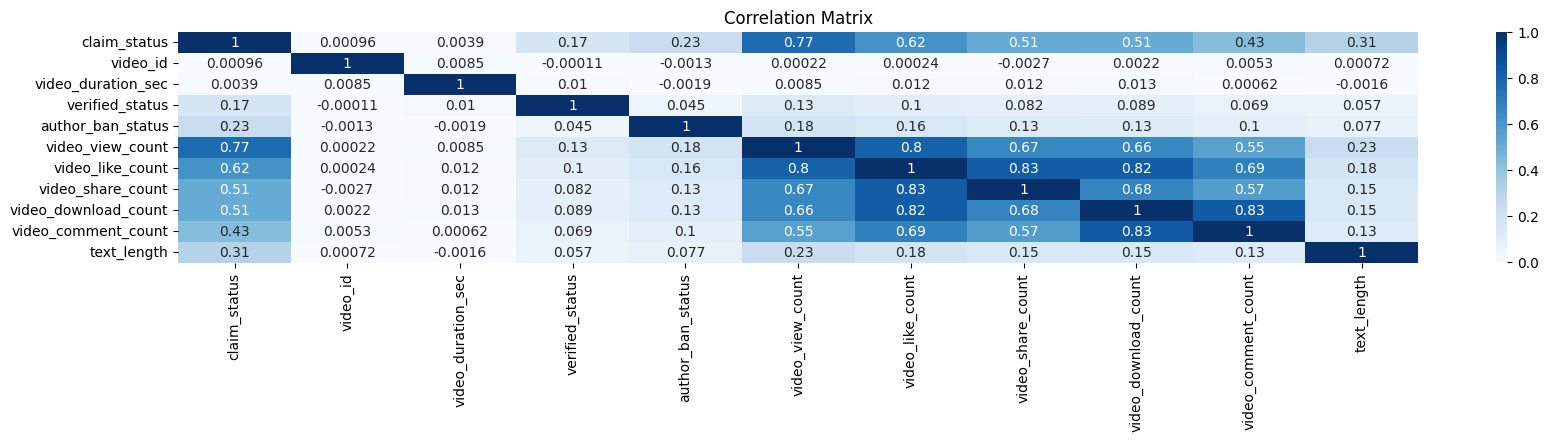

In [19]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(20, 3))
plt.title('Correlation Matrix')

sns.heatmap(data[['claim_status', 'video_id', 'video_duration_sec', 'verified_status',
       'author_ban_status', 'video_view_count', 'video_like_count',
       'video_share_count', 'video_download_count', 'video_comment_count',
       'text_length']].corr(numeric_only=True),
            cmap='Blues',
            annot=True)
plt.show();

In [20]:
data.drop('video_transcription_text', axis=1, inplace=True)

### **Task 3. Feature engineering**

Select the outcome variable.

Encode target and catgorical variables.

In [21]:
# Select outcome variable
y = data['claim_status']

**Feature selection and transformation**

### **Task 4. Split the data**


Assign target variable.

Isolate the features.

In [22]:
data = data.drop(['#', 'video_id'], axis=1)

In [23]:
data._get_numeric_data().columns

Index(['claim_status', 'video_duration_sec', 'verified_status',
       'author_ban_status', 'video_view_count', 'video_like_count',
       'video_share_count', 'video_download_count', 'video_comment_count',
       'text_length'],
      dtype='object')

In [24]:
#Isolate features
X = data[['verified_status', 'author_ban_status', 'video_view_count',
       'video_like_count', 'video_share_count', 'video_download_count',
       'video_comment_count', 'text_length']]
# Display first few rows of features dataframe
X.head()

,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,0,343296.0,19425.0,241.0,1.0,0.0,97
1,1,0,140877.0,77355.0,19034.0,1161.0,684.0,107
2,1,0,902185.0,97690.0,2858.0,833.0,329.0,137
3,1,0,437506.0,239954.0,34812.0,1234.0,584.0,131
4,1,0,56167.0,34987.0,4110.0,547.0,152.0,128


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [26]:
x_tr, x_validation, y_tr, y_validation = train_test_split(X_train, y_train,
                                                          random_state=0,
                                                          test_size=0.25)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
x_tr.shape, x_validation.shape, y_tr.shape, y_validation.shape

(15267, 8) (3817, 8) (15267,) (3817,)


((11450, 8), (3817, 8), (11450,), (3817,))

### **Task 6. Build models**


### **Build a Support Vector Machine model**

In [28]:
# Scale the data
scaler = StandardScaler().fit(X_train)
# scale training and testing sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Scale validation set
x_validation_scaled = scaler.transform(x_validation)

#### **Support Vector Machines (SVM) Model**

In [30]:
svm = SVC(kernel='rbf', random_state=0)
# Fit the model
svm.fit(X_train_scaled, y_train)

SVC(random_state=0)

In [31]:
# Make predictions on validation set
svm_pred = svm.predict(x_validation_scaled)
svm_pred[:5]

array([1, 0, 1, 1, 1])

In [32]:
# Compare the result
y_validation[:5]

5846     1
12058    0
2975     1
8432     1
6863     1
Name: claim_status, dtype: int64

In [33]:
# Make predictions on svm model
svm_prediction = svm.predict(X_test_scaled)

In [34]:
# evaluation's metrics for svm model
print("Model's Accuracy:", accuracy_score(y_test, svm_prediction))
print("Model's Recall:", recall_score(y_test, svm_prediction))
print("Model's Precision:", precision_score(y_test, svm_prediction))
print("Model's F1 score:", f1_score(y_test, svm_prediction))
print("Model's ROC-AUC:", roc_auc_score(y_test, svm_prediction))

Model's Accuracy: 0.9806130468954677
Model's Recall: 0.9608258337744838
Model's Precision: 1.0
Model's F1 score: 0.9800215982721382
Model's ROC-AUC: 0.980412916887242


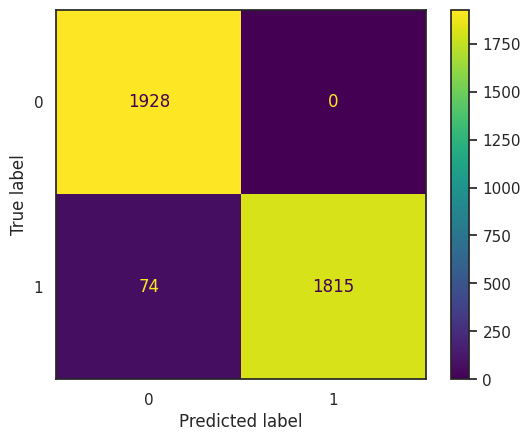

In [35]:
# Plot a confusion matrix
sns.set_theme(style='white')
cm = confusion_matrix(y_test, svm_prediction, labels=svm.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=svm.classes_)
disp.plot()
plt.show();

### **K-Nearest Neighbors Algorithm**

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [37]:
# Make predictions on validation set
knn_pred = knn.predict(x_validation_scaled)
knn_pred[:5]

array([1, 0, 1, 1, 1])

In [38]:
# Compare the result
y_validation[:5]

5846     1
12058    0
2975     1
8432     1
6863     1
Name: claim_status, dtype: int64

In [39]:
# Make predictions on knn model
knn_prediction = knn.predict(X_test_scaled)

In [40]:
# evaluation's metrics for knn model
print("Model's Accuracy:", accuracy_score(y_test, knn_prediction))
print("Model's Recall:", recall_score(y_test, knn_prediction))
print("Model's Precision:", precision_score(y_test, knn_prediction))
print("Model's F1 score:", f1_score(y_test, knn_prediction))
print("Model's ROC-AUC:", roc_auc_score(y_test, knn_prediction))

Model's Accuracy: 0.9879486507728583
Model's Recall: 0.9761778718898888
Model's Precision: 0.9994579945799458
Model's F1 score: 0.9876807712908409
Model's ROC-AUC: 0.9878295998453593


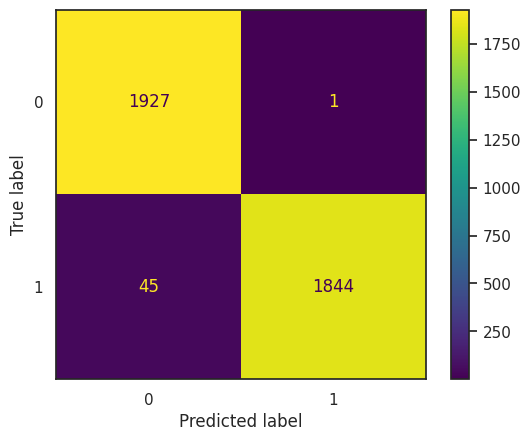

In [41]:
# Plot a confusion matrix
cm = confusion_matrix(y_test, knn_prediction, labels=knn.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)
disp.plot()
plt.show();

### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [42]:
# Instantiate the random forest classifier
random_forest = RandomForestClassifier(random_state=0)
# Create a dictionary of hyperparameters to tune
parameters = {'max_depth': [2, 3, 4, 5, 7, 8, 12, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1, 2],
             'min_samples_split': [2, 3],
             'n_estimators': [75, 100, 200, 300],
             }
# Define a set of scoring metrics to capture
scoring = {'precision', 'recall', 'accuracy', 'f1'}

# Instantiate the GridSearchCV object
classifier = GridSearchCV(random_forest,
                          cv=5,
                          param_grid=parameters,
                          scoring=scoring,
                          refit='recall')

In [43]:
%%time
classifier.fit(X_train, y_train)

CPU times: user 31min 49s, sys: 3.97 s, total: 31min 53s
Wall time: 32min 22s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 7, 8, 12, None],
                         'max_features': [0.3, 0.6], 'max_samples': [0.7],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200, 300]},
             refit='recall', scoring={'precision', 'recall', 'accuracy', 'f1'})

In [44]:
# Examine best recall score
print('Best score for Recall:', classifier.best_score_)

Best score for Recall: 0.9904136682796114


In [45]:
### YOUR CODE HERE ###

results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create a table of results.
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]})

    return table

In [46]:
# Examine best parameters
classifier.best_params_

{'max_depth': None,
 'max_features': 0.3,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 75}

**Question:** How well is your model performing? Consider average recall score and precision score.

In [47]:
result = make_results('Random Forest', classifier)
result

,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.995182,0.990414,1.0,0.995153


### **Build an XGBoost model**

In [48]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic')
# Create a dictionary of hyperparameters to tune
hyperparameters = {'max_depth': [2,3,5,7,4,8,12,None],
                'min_child_weight': [2,3, 5],
                'learning_rate': [0.01, 0.1, 0.3, 0.7],
                'n_estimators': [75,100,200,300]
                }

# Define a set of scoring metrics to capture
scoring = {'precision', 'recall', 'accuracy', 'f1'}

# Instantiate the GridSearchCV object
clf = GridSearchCV(xgb,
                   param_grid=hyperparameters,
                   scoring=scoring,
                   cv=5,
                   refit='recall')

In [49]:
%%time
clf.fit(X_train, y_train)

CPU times: user 13min 58s, sys: 7.6 s, total: 14min 5s
Wall time: 8min 1s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.7],
                         'max_depth': [2, 3, 5, 7, 4, 8, 12, None],
                         'min_child_weight': [2, 3, 5],
                         'n_estimators': [75, 100, 200, 300]},
             refit='recall', scoring={'precision', 'recall', 'accuracy', 'f1'})

In [50]:
# Get all the results from the CV and put them in a df
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])
def make_results(model_name:str, model_object):
  cv_results = pd.DataFrame(model_object.cv_results_)
  # Isolate the row of the df with the max(mean precision score)
  best_estimator_results = cv_results.iloc[cv_results['mean_test_precision'].idxmax(), :]
  accuracy = best_estimator_results.mean_test_accuracy
  precision = best_estimator_results.mean_test_precision
  recall = best_estimator_results.mean_test_recall
  f1 = best_estimator_results.mean_test_f1
  table = pd.DataFrame({'Model' : [model_name],
                        'F1' : [f1],
                        'Recall' : [recall],
                        'Precision' : [precision],
                        'Accuracy' : [accuracy]})
  return table

In [51]:
clf_result = make_results('XGBoost', clf)
clf_result

,Model,F1,Recall,Precision,Accuracy
0,XGBoost,0.994659,0.989377,1.0,0.994629


**Question:** How well does your model perform? Consider recall score and precision score.

In [52]:
pd.concat([result, clf_result], axis=0)

,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.995182,0.990414,1.0,0.995153
0,XGBoost,0.994659,0.989377,1.0,0.994629


### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [53]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
random_forest_pred = classifier.best_estimator_.predict(x_validation)

Display the predictions on the encoded testing set.

In [54]:
# Display the predictions on the encoded testing set
random_forest_pred[:10]

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

Display the true labels of the testing set.

In [55]:
# Display the true labels of the testing set
y_validation[:10]

5846     1
12058    0
2975     1
8432     1
6863     1
14032    0
17834    0
9716     0
3854     1
15242    0
Name: claim_status, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

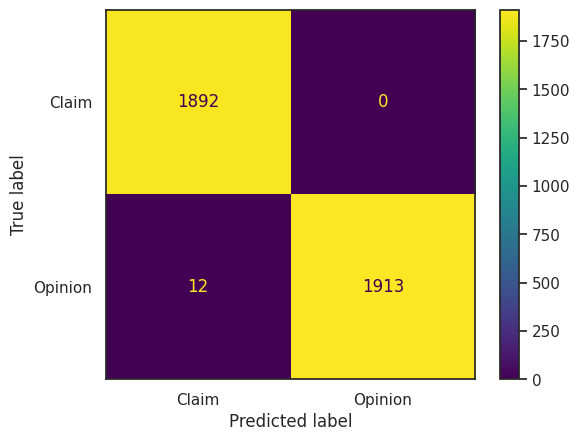

In [56]:
# Create a confusion matrix to visualize the results of the classification model
# Compute values for confusion matrix
cm = confusion_matrix(y_validation, random_forest_pred, labels=classifier.classes_)
# Create display of confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=['Claim', 'Opinion'])
# Plot confusion matrix
disp.plot()
# Display plot
plt.show();

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [57]:
# Create classification report for random forest model
target_labels = ["Claim", "Opinion"]
print(classification_report(y_validation, random_forest_pred,
                            target_names=target_labels))

              precision    recall  f1-score   support

       Claim       0.99      1.00      1.00      1892
     Opinion       1.00      0.99      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?


- A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

- As the above confusion matrix shows, this model does not produce any false positives.

#### **XGBoost**

In [58]:
#Evaluate XGBoost model
xgb_pred = clf.best_estimator_.predict(x_validation)

In [59]:
xgb_pred[:10]

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [60]:
y_validation[:10]

5846     1
12058    0
2975     1
8432     1
6863     1
14032    0
17834    0
9716     0
3854     1
15242    0
Name: claim_status, dtype: int64

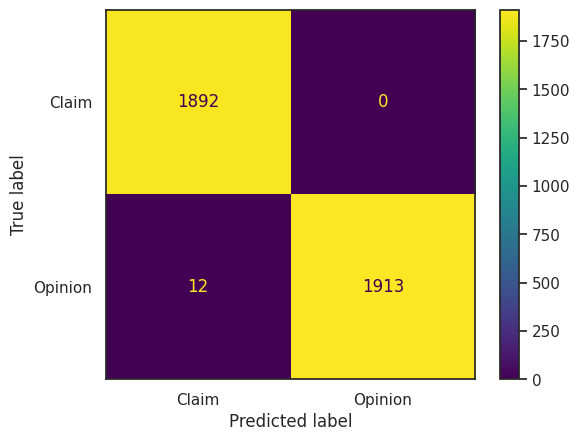

In [61]:
# Create a confusion matrix to visualize the results of the classification model
# Compute values for confusion matrix
cm = confusion_matrix(y_validation, xgb_pred, labels=clf.classes_)
# Create display of confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=['Claim', 'Opinion'])
# Plot confusion matrix
disp.plot()
# Display plot
plt.show();

In [62]:
# Create a classification report
target_labels = ["Claim", "Opinion"]
print(classification_report(y_validation, xgb_pred, target_names=target_labels))

              precision    recall  f1-score   support

       Claim       0.99      1.00      1.00      1892
     Opinion       1.00      0.99      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

**Unbelivable!** The `Random Forest` model performs slightly better than `XGBoost` model.

### **Use champion model to predict on test data**

In [63]:
# Use champion model to predict on test data
champion_pred = classifier.best_estimator_.predict(X_test)

In [64]:
champion_pred[:10]

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [65]:
y_test[:10]

3695     1
11495    0
7604     1
12728    0
875      1
16277    0
10085    0
13338    0
10377    0
14163    0
Name: claim_status, dtype: int64

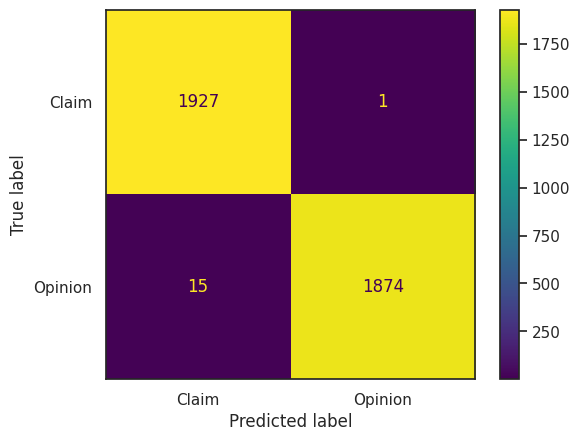

In [66]:
# Create a confusion matrix to visualize the results of the classification model
# Compute values for confusion matrix
cm = confusion_matrix(y_test, champion_pred, labels=classifier.classes_)
# Create display of confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=['Claim', 'Opinion'])
# Plot confusion matrix
disp.plot()
# Display plot
plt.show();

#### **Feature importances of champion model**


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 2200x800 with 0 Axes>

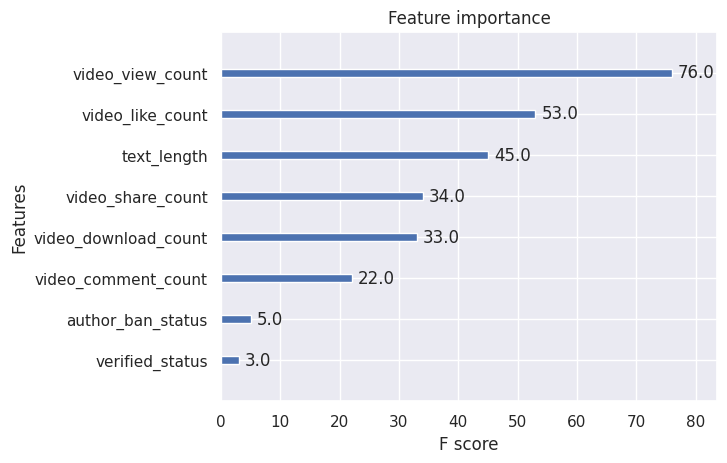

In [67]:
plt.figure(figsize=(22, 8))
sns.set_theme(style='darkgrid')
plot_importance(clf.best_estimator_)

**Question:** Describe your most predictive features. Were your results surprising?

`video_viwe_count`
No, because it had the highest correlation than others.

<Figure size 2200x800 with 0 Axes>

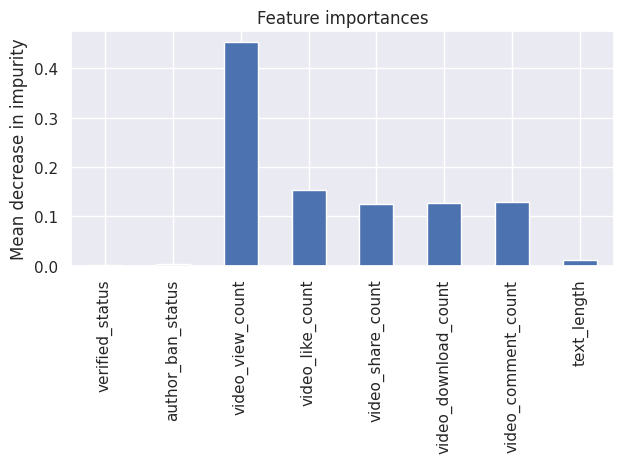

In [68]:
importances = classifier.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
plt.figure(figsize=(22, 8))
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

It is interesting that in both models, `video_view_count`, are the most relevant variable!

### 1. Predict on full dataset

In [70]:
y_preds_full = classifier.best_estimator_.predict(X)

In [73]:
# Create a new df containing just the department col from the whole dataset
final_preds = data[['author_ban_status', 'claim_status']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Check that it worked
final_preds.head(10)

,author_ban_status,claim_status,y_preds_full
0,0,1,1
1,0,1,1
2,0,1,1
3,0,1,1
4,0,1,1
5,0,1,1
6,0,1,1
7,0,1,1
8,0,1,1
9,0,1,1


### Check performance on full dataset

In [72]:
final_preds = final_preds['y_preds_full']
# Evaluation metrics for full dataset
print('Accuracy:', accuracy_score(y, final_preds))
print('Recall:', recall_score(y, final_preds))
print('Precision:', precision_score(y, final_preds))
print('F1 score:', f1_score(y, final_preds))
print('ROC-AUC:', roc_auc_score(y, final_preds))

Accuracy: 0.9971180046111926
Recall: 0.9943796835970025
Precision: 0.9998953427524856
F1 score: 0.9971298857172677
ROC-AUC: 0.9971370769188052


### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**
Yes, one can recommend this model because it performed well on both the validation and test holdout data.
2. **What was your model doing? Can you explain how it was making predictions?**
The model's most predictive features were all related to the user engagement levels associated with each video.
3. **Are there new features that you can engineer that might improve model performance?**
Because the model currently performs nearly perfectly, there is no need to engineer any new features.
4. **What features would you want to have that would likely improve the performance of your model?**
The current version of the model does not need any new features. However, it would be helpful to have the number of times the video was reported.<br>

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.